In [1]:
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
import PyPDF2

def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as pdf_file:
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        for page in pdf_reader.pages:
            text += page.extract_text()
    return text

directory_path = "data/"  

syllabusList = []
titles = []

# print(os.startfile("data/A&A.pdf"))

# need to do some preprocessing to get syably in order 

for filename in os.listdir("data/"):
   
    if filename.endswith('.pdf'):
        text = extract_text_from_pdf("data/" + filename)
        words = text.split()
        with open("test.txt", "w", encoding="utf-8") as file:
            # Write the text to the file
            file.write(text)
    if filename.endswith('.txt'):
        
        titles.append(filename)
        newSyllabus = open("data/" + filename)
        print(newSyllabus)
        syllabusList.append(newSyllabus)


# print(syllabusList[0])


<_io.TextIOWrapper name='data/Bussiness_comm.txt' mode='r' encoding='cp1252'>
<_io.TextIOWrapper name='data/data_mining.txt' mode='r' encoding='cp1252'>
<_io.TextIOWrapper name='data/european_hist.txt' mode='r' encoding='cp1252'>
<_io.TextIOWrapper name='data/structures_of_comp_sci.txt' mode='r' encoding='cp1252'>
<_io.TextIOWrapper name='data/theory_of_comp.txt' mode='r' encoding='cp1252'>


In [2]:
# # so once we remove the stop words they become further apart but that is good 
# vectorizer = CountVectorizer(input='file', stop_words='english', ngram_range = (1,1), token_pattern="[^\W\d_]+")

# # so when I do them togther i seem to get the same size vector 
# vectors = vectorizer.fit_transform(syllabusList)
# print(vectors[0].shape)
# print(vectors[1].shape)
# print(vectors[2].shape)
# # print(vectors)
# # print(vectorizer.vocabulary_)
# similarity = cosine_similarity(vectors)
# print(similarity)

In [3]:
# cluster = AgglomerativeClustering().fit(similarity)
# print(cluster.labels_)

(1, 1653)
(1, 1653)
(1, 1653)
[[1.         0.24446121 0.26666619 0.31950171 0.28246713]
 [0.24446121 1.         0.19363726 0.45684928 0.35402924]
 [0.26666619 0.19363726 1.         0.29878529 0.26236331]
 [0.31950171 0.45684928 0.29878529 1.         0.54191633]
 [0.28246713 0.35402924 0.26236331 0.54191633 1.        ]]


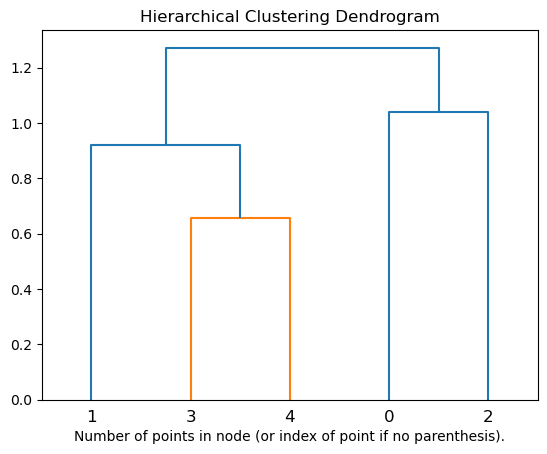

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

vectorizer = CountVectorizer(input='file', stop_words='english', ngram_range = (1,1), token_pattern="[^\W\d_]+")

# so when I do them togther i seem to get the same size vector 
vectors = vectorizer.fit_transform(syllabusList)
print(vectors[0].shape)
print(vectors[1].shape)
print(vectors[2].shape)
# print(vectors)
# print(vectorizer.vocabulary_)
similarity = cosine_similarity(vectors)
print(similarity)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(similarity)
# # print(model)
    
# # so iris is a lot of data like that 
# iris = load_iris()
# # print(iris)
# # [4.9, 3. , 1.4, 0.2],

# X = iris.data
# # print(X)
# # X is now just the data I guess there are some 
# # setting distance_threshold=0 ensures we compute the full tree.
# model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# model = model.fit(X)
# # print(model)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

([<matplotlib.axis.XTick at 0x1f5ec480790>,
 [Text(0.5, 0, 'Bussiness_comm.txt'),
  Text(1.5, 0, 'data_mining.txt'),
  Text(2.5, 0, 'european_hist.txt'),
  Text(3.5, 0, 'structures_of_comp_sci.txt'),
  Text(4.5, 0, 'theory_of_comp.txt')])

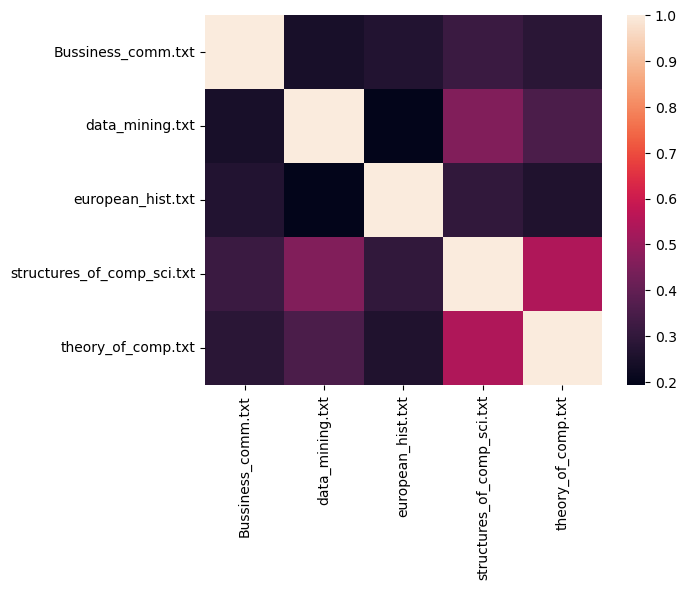

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.heatmap(similarity)

plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=titles, rotation=0)

plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=titles, rotation=90)



In [6]:
print(syllabusList[0])

<_io.TextIOWrapper name='data/Bussiness_comm.txt' mode='r' encoding='cp1252'>


In [7]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0],
             [10, 2], [10, 4], [10, 0]])
clustering = AgglomerativeClustering(n_clusters=3).fit(X)
clustering
clustering.labels_

array([2, 2, 2, 1, 1, 1, 0, 0, 0], dtype=int64)